In [1]:
import Args
import functions
import agents
import importlib
import MDP_env

importlib.reload(Args)
importlib.reload(functions)
importlib.reload(agents)
importlib.reload(MDP_env)

from Args import *
from functions import*
from agents import *
from MDP_env import *

import pickle
import matplotlib.pyplot as plt

import gymnasium as gym

args=Args_()

2024-11-24 23:45:57.512226: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
DQN=DQNAgent(args,stoch=False,double=True)
DQN.train()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: tarike (tarike-maastricht-university). Use `wandb login --relogin` to force relogin


/Users/tarikelkhoury/Documents/Maas/internship/Stochastic-Q-learning/functions.py:157: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  actions_tensor = torch.tensor(actions_tensor)


In [21]:
env=gym.make_vec(args.env_id,num_envs=args.num_envs)

In [22]:
env.observation_space.shape[1]+env.action_space.shape[1]

5

In [5]:
env=gym.make_vec(args.env_id,num_envs=args.num_envs)

In [9]:
actions_list=discretize_action_space(env,args.i)
len(actions_list)
round(np.log2(len(actions_list)))

9

In [54]:
env=gym.make_vec("HalfCheetah-v4",num_envs=2)
actions_tensor=discretize_action_space(env,4)
actions_tensor.shape

(4096, 6)

In [73]:
actions_list=[0,1,2,3]
actions_tensor = torch.tensor(actions_list, dtype=torch.int)
actions_tensor.reshape(-1,1).shape
actions_tensor

tensor([0, 1, 2, 3], dtype=torch.int32)

In [2]:
with open ('server_run2.pkl', 'rb') as f:
    results=pickle.load(f)

In [8]:
env=gym.make("Breakout-v4")
obs,_env.reset()

NameError: name 'obs' is not defined

In [3]:
results.keys()

dict_keys(['rewards_Random_model', 'acu_reward_Random_model', 'episodes_length_Random_model', 'rewards_Q_Learning_model', 'acu_reward_Q_Learning_model', 'episodes_length_Q_Learning_model', 'rewards_Stoch_Q_Learning_model', 'acu_reward_Stoch_Q_Learning_model', 'episodes_length_Stoch_Q_Learning_model', 'rewards_Double_Q_Learning_model', 'acu_reward_Double_Q_Learning_model', 'episodes_length_Double_Q_Learning_model', 'rewards_Stoch_Double_Q_Learning_model', 'acu_reward_Stoch_Double_Q_Learning_model', 'episodes_length_Stoch_Double_Q_Learning_model', 'rewards_Sarsa_model', 'acu_reward_Sarsa_model', 'episodes_length_Sarsa_model', 'rewards_Stoch_Sarsa_model', 'acu_reward_Stoch_Sarsa_model', 'episodes_length_Stoch_Sarsa_model', 'average_rewards_Random_model', 'average_acu_reward_Random_model', 'average_rewards_Q_Learning_model', 'average_acu_reward_Q_Learning_model', 'average_rewards_Stoch_Q_Learning_model', 'average_acu_reward_Stoch_Q_Learning_model', 'average_rewards_Double_Q_Learning_model'

In [4]:
results["info"]

['total time in hours: 0.6596750693851047 env: FrozenLake-v1 C size: 2 memory size M 2 and alpha follows the function']

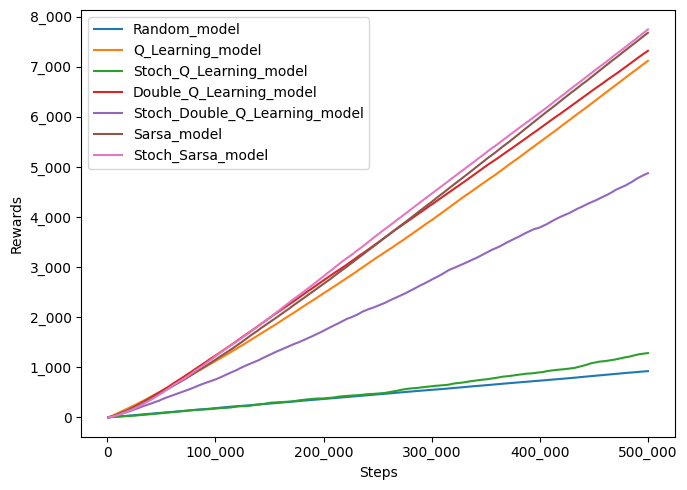

In [5]:
models_name=["Random_model","Q_Learning_model","Stoch_Q_Learning_model","Double_Q_Learning_model","Stoch_Double_Q_Learning_model","Sarsa_model","Stoch_Sarsa_model"]

one_plot_1(results["average_acumulated_rewards"],models_name,1000)

In [127]:
models_name=["Random_model","Q_Learning_model","Stoch_Q_Learning_model","Double_Q_Learning_model","Stoch_Double_Q_Learning_model","Sarsa_model","Stoch_Sarsa_model"]
avg_rewards=[]
avg_acu=[]
for name in models_name:
    avg_rewards.append(results[f"average_rewards_{name}"])
    avg_acu.append(results[f"average_acu_reward_{name}"])
results["average_rewards"]=avg_rewards
results["average_acumulated_rewards"]=avg_acu

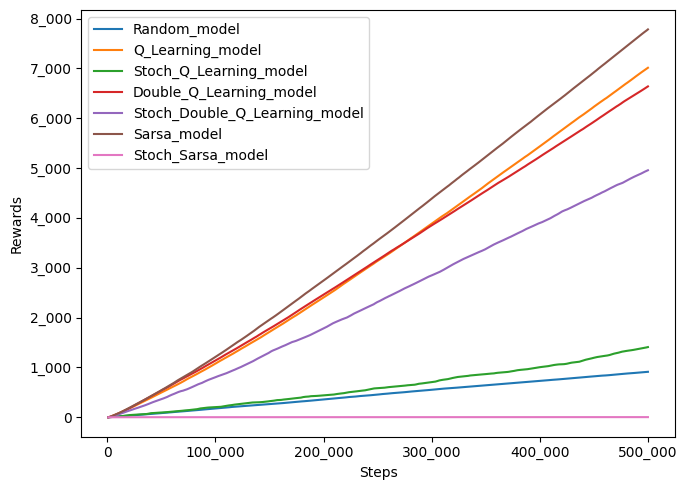

In [128]:
one_plot_1(results["average_acumulated_rewards"],models_name,1000)


In [113]:
models_name=["Random_model","Q_Learning_model","Stoch_Q_Learning_model","Double_Q_Learning_model","Stoch_Double_Q_Learning_model","Sarsa_model","Stoch_Sarsa_model"]
results={}
for name in models_name:
    results[f"rewards_{name}"]=[]
    results[f"acu_rewards_{name}"]=[]
    results[f"episodes_length_{name}"]=[]
for i in range(10):
    print(f"step: {i}")
    Random_model=RandomAgent(args)

    Q_Learning_model=QLearningAgent(args)
    Stoch_Q_Learning_model=Stoch_QLearningAgent(args)

    Double_Q_Learning_model=DoubleQLearningAgent(args)
    Stoch_Double_Q_Learning_model=Stoch_DoubleQLearningAgent(args)

    Sarsa_model=SARSAAgent(args)
    Stoch_Sarsa_model=Stoch_SARSAAgent(args)

    models=[Random_model,Q_Learning_model,Stoch_Q_Learning_model,Double_Q_Learning_model,Stoch_Double_Q_Learning_model,Sarsa_model,Stoch_Sarsa_model]
    
    for model,name in zip(models,models_name):
        reward,acu_reward,length=model.train()
        results[f"rewards_{name}"].append(reward)
        results[f"acu_rewards_{name}"].append(acu_reward)
        results[f"episodes_length_{name}"].append(length)
        

for name in models_name:
    results[f"average_rewards_{name}"]=np.average(np.array(results[f"rewards_{name}"]),axis=0)
    results[f"average_acu_rewards_{name}"]=np.average(np.array(results[f"acu_rewards_{name}"]),axis=0)
avg_rewards=[]
avg_acu=[]

for name in models_name:
    avg_rewards.append(results[f"average_rewards_{name}"])
    avg_acu.append(results[f"average_acu_rewards_{name}"])
results["average_rewards"]=avg_acu
results["average_acumulated_rewards"]=avg_acu

step: 0
step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9


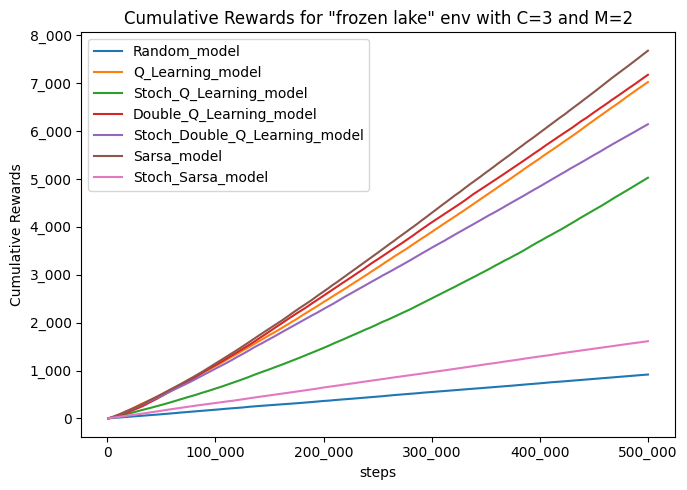

In [15]:
one_plot_1(avg_cum_rewards,models_name,1_000,y_name="Cumulative Rewards" ,title= "Cumulative Rewards for \"frozen lake\" env with C=3 and M=2" )

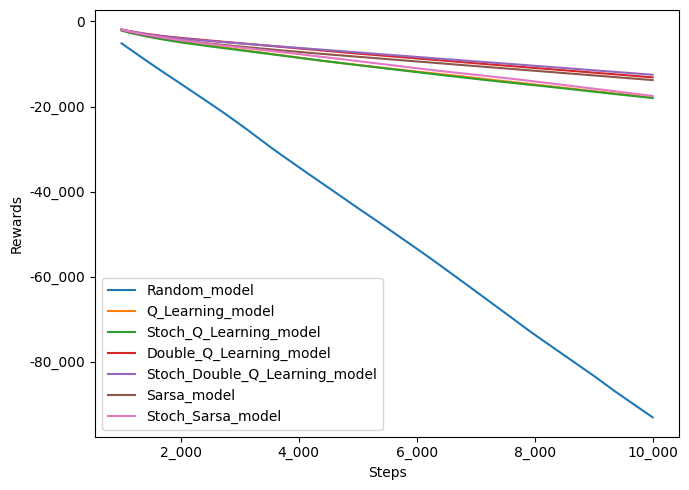

In [104]:
one_plot_1(avg_acu,models_name,1000)

In [75]:
length_of_episodes=[]
for name in models_name:
    length_for_model=[]
    for data in results[f"episodes-length_{name}"]:
        tmp=epi_length_convert(data)
        length_for_model.append(tmp)
    length_of_episodes.append(length_for_model)